# Workflow example:  To what extent are you a positive person? 

### Steps ###
0. **Formulate Research Question**
1. **Determine which variable should be computed to answer RQ**
2. **Select raw data source**
3. **List available information in raw data source**
4. **Select required information to compute variable**
5. **Compute variable**
6. **Send result**
____________________________________________________________________________________________________________

In [1]:
import json
import pandas as pd
from pathlib import Path
import numpy as np
import emojis
import emoji
import regex
import matplotlib.pyplot as plt

### 0. Research Question

--> To what extent are you a positive or negative person?

### 1. Variable

* How many emoji's have you used in your posts? Development over time?
* Were these positive or negative emoji's? Development over time?

### 2. Raw data source

--> Instagram

### 3. List available information

--> comments, media (stories, photos, videos), messages

**Set path**

In [2]:
project = Path('C:/Users/Roos/Documents/Trainee.nl/Opdrachten/UU/Miffy/insta')
data = project /'datadownload'

In [3]:
json_file_com = data / 'comments.json'
json_file_med = data / 'media.json'
json_file_mes = data / 'messages.json'

**Load Media file**

In [4]:
# Load media.json
with open(json_file_med, encoding = "utf8") as json_media:
    media = json.load(json_media)
    
media = pd.DataFrame.from_dict(media, 
        orient = 'index').T 

In [5]:
# Generate separate DataFrames for the different lists (i.e., stories, photos, videos) in media
stories_media = pd.DataFrame(media['stories'].dropna().values.tolist())
photos_media  = pd.DataFrame(media['photos'].dropna().values.tolist())
profile_media = pd.DataFrame(media['profile'].dropna().values.tolist())
videos_media  = pd.DataFrame(media['videos'].dropna().values.tolist())
direct_media  = pd.DataFrame(media['direct'].dropna().values.tolist())

**Load Comments file**

In [6]:
# Load comments.json
with open(json_file_com, encoding = "utf8") as json_comments:
        comments = json.load(json_comments)

comments = pd.DataFrame.from_dict(comments, 
                                      orient = 'index').T 

In [22]:
# Generate dataframe from media comments 
media_comments = pd.DataFrame(comments['media_comments'].dropna().values.tolist())

**Load Messages file**

In [23]:
# Load messages.json
with open(json_file_mes, encoding = "utf8") as json_messages:
    message = json.load(json_messages)

messages = pd.DataFrame.from_dict(message[1], 
                                          orient = 'index').T
for i in range(2, len(message)):
    # Create dataframe    
    messages = messages.append(pd.DataFrame.from_dict(message[i], 
                                          orient = 'index').T)


In [24]:
# Generate dataframe from message conversation 
messages_conversation = pd.DataFrame(messages['conversation'].dropna().values.tolist())

**Select relevant information**

In [25]:
# Function to extract emojis
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

*Media files*: only stories, videos and photos contain emojis. Stories (photos/videos that are only available for 24hours), photos (posts on own page with a photo format), videos (posts on own page with a video format).

In [26]:
# Extract emoticons in posts (photos)
photos = []

for i in range(0,len(photos_media['caption'])):
    
    text = str(photos_media['caption'][i])
    time = str(photos_media['taken_at'][i])
    
    emoticons = split_count(text)
    
    if len(emoticons) > 0:
        phot_dic = {}
        phot_dic['time'] = time
        phot_dic['emoticon'] = emoticons
        phot_dic['count'] = len(emoticons)
        photos.append(phot_dic) 

# Dictionary
photos

# Dataframe
dataframe_photos = pd.DataFrame(photos, columns=['time', 'emoticon', 'count'])
dataframe_photos.head()

,time,emoticon,count
0,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
1,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
2,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
3,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
4,2020-01-21T13:40:28+00:00,"[🌍, 🧘‍♀️]",2


In [27]:
# Extract emoticons in posts (videos)
videos = []

for i in range(0,len(videos_media['caption'])):
    
    text = str(videos_media['caption'][i])
    time = str(videos_media['taken_at'][i])
    
    emoticons = split_count(text)
    
    if len(emoticons) > 0:
        vid_dic = {}
        vid_dic['time'] = time
        vid_dic['emoticon'] = emoticons
        vid_dic['count'] = len(emoticons)
        videos.append(vid_dic) 

# Dictionary
videos

# Dataframe
dataframe_videos = pd.DataFrame(videos, columns=['time', 'emoticon', 'count'])
dataframe_videos.head()

,time,emoticon,count
0,2019-10-16T23:55:52+00:00,"[👋, 💤, 🌎, 🌞, ⬇️, 🌌, 🌜, ⬆️, 🌠, 💖]",10


In [28]:
# Extract emoticon in stories
stories = []

for i in range(0,len(stories_media['caption'])):
    
    text = str(stories_media['caption'][i])
    time = str(stories_media['taken_at'][i])
    
    emoticons = split_count(text)
    
    if len(emoticons) > 0:
        stor_dic = {}
        stor_dic['time'] = time
        stor_dic['emoticon'] = emoticons
        stor_dic['count'] = len(emoticons)
        stories.append(stor_dic) 

# Dictionary
stories

# Dataframe
dataframe_stories = pd.DataFrame(stories, columns=['time', 'emoticon', 'count'])
dataframe_stories.head()

,time,emoticon,count
0,2020-04-11T18:07:23+00:00,[👋],1
1,2020-04-02T16:29:13+00:00,[👋],1
2,2020-02-05T16:36:50+00:00,[🙄],1
3,2020-01-22T14:52:11+00:00,"[😬, 😳]",2
4,2019-10-04T02:19:26+00:00,[🤯],1


In [45]:
# Combine all media emoticons
media_emoticons = dataframe_photos.append(dataframe_videos)
media_emoticons = media_emoticons.append(dataframe_stories)
media_emoticons = media_emoticons.reset_index(drop=True)
media_emoticons.head()

,time,emoticon,count
0,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
1,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
2,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
3,2020-03-06T10:52:18+00:00,"[🐒, 🦁, 🦍, 🐆, 🐖, 🐫, 🦘, 🦒, 🐘, 🦇, 🐧, 🦅, 🦉, 🦚, 🐊, 🐠]",16
4,2020-01-21T13:40:28+00:00,"[🌍, 🧘‍♀️]",2


*Comments*: comments on (other people's) posts

In [30]:
# Create dataframe with own comments
user = "roosvoor" #Enter username

own_comments = pd.DataFrame(media_comments[media_comments[2] == user])
own_comments = own_comments.reset_index(drop=True)
own_comments = own_comments.rename(columns={0: 'taken_at', 1:'caption', 2:'user'})

In [33]:
commentaar = []

for i in range(0,len(own_comments['caption'])):
    
    text = str(own_comments['caption'][i])
    time = str(own_comments['taken_at'][i])
    
    emoticons = split_count(text)
    
    if len(emoticons) > 0:
        com_dic = {}
        com_dic['time'] = time
        com_dic['emoticon'] = emoticons
        com_dic['count'] = len(emoticons)
        commentaar.append(com_dic) 

# Dictionary
commentaar

# Dataframe
dataframe_comments = pd.DataFrame(commentaar, columns=['time', 'emoticon', 'count'])
dataframe_comments.head()

,time,emoticon,count
0,2019-10-17T02:22:22+00:00,[🙌],1
1,2019-05-06T16:56:19+00:00,[😬],1
2,2019-05-06T16:56:00+00:00,[😊],1
3,2019-05-06T16:07:28+00:00,"[🙄, 🙄, 🙄]",3
4,2018-10-18T14:43:05+00:00,[🙌],1


*Messages*: personal text messages with other instagram users

In [34]:
user = "roosvoor" #Enter username

own_messages = pd.DataFrame(messages_conversation[messages_conversation['sender'] == user])
own_messages = own_messages.reset_index(drop=True)
own_messages.head()

,sender,created_at,story_share,text,media_owner,media_share_caption,media_share_url,mentioned_username,media,video_call_action,...,animated_media_images,is_random,user,action,story_share_type,heart,voice_media,link,profile_share_username,profile_share_name
0,roosvoor,2020-04-11T18:42:49.818832+00:00,Shared beertjelohman's story,Haha lekkaahh,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,roosvoor,2019-12-29T15:05:47.218007+00:00,NaN,Maar kan dus alleen maar beter wordn 💪🎉,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,roosvoor,2019-12-29T15:05:16.606476+00:00,NaN,Lekker begin 😅,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,roosvoor,2019-12-29T15:04:52.273959+00:00,NaN,Haha o nooooo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,roosvoor,2019-12-29T09:19:44.654836+00:00,NaN,Hopelijk is de rest van de reis wel voorspoedi...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
messages = []

for i in range(0,len(own_messages['text'])):
    
    text = str(own_messages['text'][i])
    time = str(own_messages['created_at'][i])
    
    emoticons = split_count(text)
    
    if len(emoticons) > 0:
        mes_dic = {}
        mes_dic['time'] = time
        mes_dic['emoticon'] = emoticons
        mes_dic['count'] = len(emoticons)
        messages.append(mes_dic) 

# Dictionary
messages

# Dataframe
dataframe_messages = pd.DataFrame(messages, columns=['time', 'emoticon', 'count'])
dataframe_messages.head()

,time,emoticon,count
0,2019-12-29T15:05:47.218007+00:00,"[💪, 🎉]",2
1,2019-12-29T15:05:16.606476+00:00,[😅],1
2,2019-12-29T09:19:44.654836+00:00,[😬],1
3,2018-07-17T06:37:27.007343+00:00,"[😎, ❤️, 👌, 👌, 👌]",5
4,2020-03-12T12:06:57.514490+00:00,[🔥],1


**All emotions from all sources together**

In [47]:
# Combine all dataframes
insta_emoticons = dataframe_messages.append(dataframe_comments)
insta_emoticons = insta_emoticons.append(media_emoticons)
insta_emoticons = insta_emoticons.reset_index(drop=True)

insta_emoticons.head()

,time,emoticon,count
0,2019-12-29T15:05:47.218007+00:00,"[💪, 🎉]",2
1,2019-12-29T15:05:16.606476+00:00,[😅],1
2,2019-12-29T09:19:44.654836+00:00,[😬],1
3,2018-07-17T06:37:27.007343+00:00,"[😎, ❤️, 👌, 👌, 👌]",5
4,2020-03-12T12:06:57.514490+00:00,[🔥],1


*Summary:* There are 222 different posts, messages and comments containing 469 emoticons. 

In [48]:
# Number of posts
len(insta_emoticons)

222

In [49]:
# Number of posts
sum(insta_emoticons['count'])

469

**Plot emoji usage**

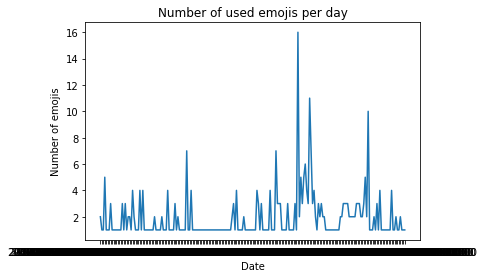

In [50]:
plt.plot(insta_emoticons['time'], insta_emoticons['count'])
plt.xlabel('Date')
plt.ylabel('Number of emojis')
plt.title('Number of used emojis per day')
plt.show() 